In [23]:
import pandas as pd
import numpy as np
import seaborn as sns


from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [2]:
cols = ['snoring_rate',
'respiration_rate',
'body_temperature',
'limb_movement',
'blood_oxygen',
'eye_movement',
'sleeping_hours',
'heart_rate',
'stress_level']

In [3]:
pth="/content/drive/MyDrive/MSIB/06. Classification/"

In [4]:
df = pd.read_csv(pth+"SaYoPillow.csv")
df.columns = cols
df.head()

,snoring_rate,respiration_rate,body_temperature,limb_movement,blood_oxygen,eye_movement,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [5]:
df['stress_level'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stress_level, dtype: int64

In [6]:
x = df.drop('stress_level',axis=1)
y = df.stress_level

In [7]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,dummy_y, train_size = 0.7)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(441, 8) (189, 8)
(441, 5) (189, 5)


In [9]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [10]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=150, batch_size=10, verbose=1, validation_data=[x_test, y_test])

Epoch 1/150
45/45 [==============================] - 2s 15ms/step - loss: 5.7223 - accuracy: 0.3832 - val_loss: 2.9332 - val_accuracy: 0.4392
Epoch 2/150
45/45 [==============================] - 0s 7ms/step - loss: 1.8714 - accuracy: 0.5714 - val_loss: 1.2884 - val_accuracy: 0.7513
Epoch 3/150
45/45 [==============================] - 0s 6ms/step - loss: 1.0489 - accuracy: 0.7279 - val_loss: 0.7841 - val_accuracy: 0.7619
Epoch 4/150
45/45 [==============================] - 0s 5ms/step - loss: 0.7422 - accuracy: 0.6780 - val_loss: 0.6277 - val_accuracy: 0.6402
Epoch 5/150
45/45 [==============================] - 0s 5ms/step - loss: 0.6236 - accuracy: 0.5873 - val_loss: 0.5407 - val_accuracy: 0.6296
Epoch 6/150
45/45 [==============================] - 0s 6ms/step - loss: 0.5436 - accuracy: 0.6281 - val_loss: 0.4831 - val_accuracy: 0.6349
Epoch 7/150
45/45 [==============================] - 0s 5ms/step - loss: 0.4893 - accuracy: 0.6803 - val_loss: 0.4321 - val_accuracy: 0.6349
Epoch 8/150


In [12]:
# evaluate the keras model
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

6/6 [==============================] - 0s 2ms/step - loss: 2.3048e-04 - accuracy: 1.0000
Accuracy: 100.00


In [20]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_pred_class

array([1, 2, 1, 0, 2, 2, 2, 0, 1, 3, 4, 3, 4, 3, 3, 4, 2, 2, 3, 2, 2, 0,
       2, 3, 2, 4, 3, 1, 0, 4, 0, 4, 0, 4, 1, 4, 1, 4, 1, 4, 4, 1, 0, 4,
       0, 3, 1, 4, 2, 4, 3, 2, 1, 1, 0, 3, 2, 2, 0, 4, 3, 0, 4, 1, 2, 1,
       0, 3, 0, 2, 2, 0, 4, 0, 4, 2, 1, 0, 3, 2, 1, 2, 2, 0, 0, 3, 2, 2,
       4, 1, 1, 0, 1, 0, 2, 0, 2, 4, 0, 1, 3, 3, 4, 0, 1, 1, 1, 3, 2, 1,
       0, 0, 2, 1, 2, 0, 2, 2, 2, 3, 3, 0, 0, 4, 0, 3, 0, 4, 0, 4, 0, 2,
       0, 4, 2, 3, 1, 4, 2, 1, 1, 4, 0, 3, 4, 2, 0, 4, 4, 2, 0, 0, 3, 3,
       0, 0, 3, 3, 2, 2, 0, 3, 3, 4, 0, 4, 2, 3, 4, 4, 4, 0, 4, 4, 1, 0,
       2, 1, 3, 1, 2, 0, 0, 1, 3, 2, 2, 1, 4])

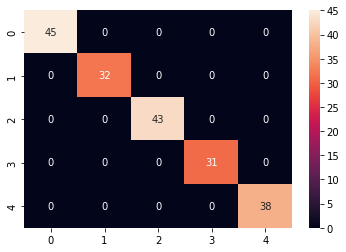

In [25]:
y_test_class = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test_class, y_pred_class)
sns.heatmap(cm, annot=True)